# 合併訓練時儲存的 precision & recall csv

## Import required libraries

In [2]:
import os
import glob
import pandas as pd

## Concatenate all csv file

In [3]:
target_dir = 'resNet18_79dump'
os.chdir(target_dir)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list
combined_csv = pd.concat([pd.read_csv(f).rename(index={0: f.split('_')[1][:-4]}) for f in all_filenames])
combined_csv.drop(combined_csv.columns[1], axis=1, inplace=True)
combined_csv.rename({combined_csv.columns[0]:'metric'}, axis='columns', inplace=True)
combined_csv.head()

# export to csv
output_csv = 'combined.csv'
outdir = 'result'
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, output_csv)    
combined_csv.to_csv(fullname)

# Explicit

### PRECISION & RECALL

In [5]:
combined_csv = pd.read_csv(os.path.join('result', 'combined.csv'))
combined_csv = combined_csv.rename(columns={combined_csv.columns[0]:'target'})
combined_csv = combined_csv[combined_csv['metric']=='recall']
combined_csv.head()

,target,metric,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,common tulip,recall,0.428135,0.754332,0.795107,0.835882,0.835882,0.876656,0.876656,0.835882,...,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656
2,desert-rose,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327869,...,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607
3,sweet pea,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,columbine,recall,0.090703,0.000000,0.000000,0.181406,0.181406,0.272109,0.362812,0.362812,...,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218
5,wild pansy,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.331950,0.331950,0.663900,...,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876


### Original Label File

In [6]:
os.chdir('..')
label_df = pd.read_csv('trainval.csv')
label_df.head()

,dirpath,target,label
0,train/alpine sea holly,alpine sea holly,0
1,train/alpine sea holly,alpine sea holly,0
2,train/alpine sea holly,alpine sea holly,0
3,train/alpine sea holly,alpine sea holly,0
4,train/alpine sea holly,alpine sea holly,0


#### 個別species的數量

In [7]:
species_nums = label_df.groupby(['label','target']).count().rename(columns={'dirpath':'count'})
species_nums.sort_values('count', ascending=False)

,,count
label,target,
50,iris,1010
101,wild rose,959
99,wild geranium,908
26,common dandelion,727
86,sunflower,594
...,...,...
34,fire lily,25
80,siam tulip,24
12,bolero deep blue,23


### 取得所有數值型資料

In [8]:
combined_csv['label'] = combined_csv['target'].apply(lambda x: label_df[label_df['target']==x]['label'].unique()[0])

In [9]:
combined_csv.head()

,target,metric,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,label
0,common tulip,recall,0.428135,0.754332,0.795107,0.835882,0.835882,0.876656,0.876656,0.835882,...,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,27
2,desert-rose,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327869,...,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,33
3,sweet pea,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87
4,columbine,recall,0.090703,0.000000,0.000000,0.181406,0.181406,0.272109,0.362812,0.362812,...,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,25
5,wild pansy,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.331950,0.331950,0.663900,...,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,100


In [11]:
timeseries = combined_csv[combined_csv.columns[2:36]].set_index(combined_csv['label'])
timeseries.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
label,,,,,,,,,,,,,,,,,,,,,
27,0.428135,0.754332,0.795107,0.835882,0.835882,0.876656,0.876656,0.835882,0.876656,0.876656,...,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656,0.876656
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327869,0.983607,0.983607,...,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607,0.983607
87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,0.090703,0.000000,0.000000,0.181406,0.181406,0.272109,0.362812,0.362812,0.362812,0.362812,...,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218,0.544218
100,0.000000,0.000000,0.000000,0.000000,0.000000,0.331950,0.331950,0.663900,0.663900,0.663900,...,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876,0.829876


### Avg Trend in a period

In [13]:
trend = timeseries.T.diff()
trend = trend.sum(axis=0)
combined_csv['trend'] = combined_csv['label'].apply(lambda x: trend.loc[x])

In [14]:
trend = timeseries.T.sum()
combined_csv['totalSum'] = combined_csv['label'].apply(lambda x: trend.loc[x])

#### 訓練過程中猜不到以及未猜中的cases (prec == 0 & recall == 0)

In [15]:
notImprovedIndex = combined_csv[combined_csv['totalSum']==0]['label'].values
notImprovedIndex

array([87, 84, 44, 93, 75, 19, 95, 12, 79])

#### trend < 0

In [16]:
notImprovedIndex = combined_csv[combined_csv['trend']<0]['label'].values
notImprovedIndex

array([78, 86])

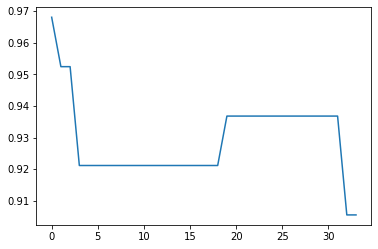

In [18]:
from matplotlib import pyplot as plt
plt.plot(range(timeseries.loc[86].size),timeseries.loc[86])

#### trend == 0

In [19]:
balanceIndex = combined_csv[combined_csv['trend']==0]['label'].values
balanceIndex

array([87, 84, 44, 93, 75, 19, 95, 12, 79])

#### 嘗試想預測但是失敗的cases

In [20]:
notImprovedIndex = combined_csv[combined_csv['totalSum']==0]['label'].values
balanceIndex = combined_csv[combined_csv['trend']==0]['label'].values
set(balanceIndex) - set(notImprovedIndex)

set()

### 將做不好的cases去除重新訓練

#### 剩餘的classes個數

In [17]:
df_filter = label_df[~label_df['label'].isin(notImprovedIndex)]
df_filter['label'].nunique()

94

#### 重新安排classes的順序,從 0 開始

In [18]:
d = {i:n for n,i in enumerate(df_filter['label'].unique())}
df_filter['label'] = df_filter['label'].apply(lambda x: d[x])

#### 儲存成新的 ground-truth

In [20]:
df_filter.to_csv('new_trainval.csv',index=None)